In [23]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [24]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HSG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [25]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [26]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [27]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[15.57306622 15.5679212  15.56277619 15.55763118 15.55248617 15.54734115
 15.54219614 15.53705113 15.53190611 15.5267611  15.52161609 15.51647108
 15.51132606 15.50618105 15.50103604 15.49589102 15.49074601 15.485601
 15.48045599 15.47531097 15.47016596 15.46502095 15.45987593 15.45473092
 15.44958591 15.4444409  15.43929588 15.43415087 15.42900586 15.42386084]


In [28]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 10.687181035459163
Testing MAPE: 194.1598343008664
Testing MAE: 10.669505167307724


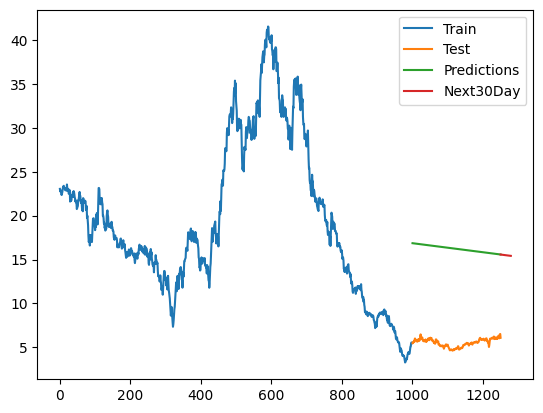

In [29]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [30]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[15.57306622 15.5679212  15.56277619 15.55763118 15.55248617 15.54734115
 15.54219614 15.53705113 15.53190611 15.5267611  15.52161609 15.51647108
 15.51132606 15.50618105 15.50103604 15.49589102 15.49074601 15.485601
 15.48045599 15.47531097 15.47016596 15.46502095 15.45987593 15.45473092
 15.44958591 15.4444409  15.43929588 15.43415087 15.42900586 15.42386084
 15.41871583 15.41357082 15.40842581 15.40328079 15.39813578 15.39299077
 15.38784575 15.38270074 15.37755573 15.37241072 15.3672657  15.36212069
 15.35697568 15.35183066 15.34668565 15.34154064 15.33639563 15.33125061
 15.3261056  15.32096059 15.31581557 15.31067056 15.30552555 15.30038054
 15.29523552 15.29009051 15.2849455  15.27980048 15.27465547 15.26951046]


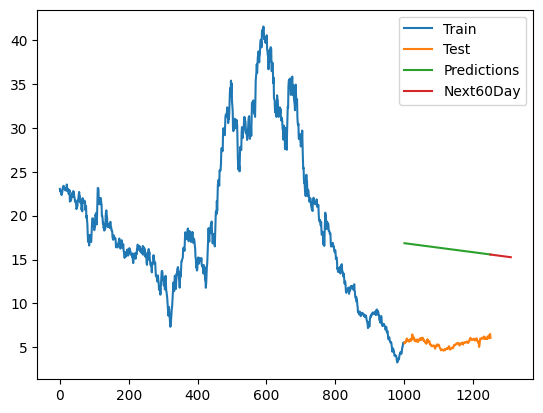

In [31]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [32]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[15.57306622 15.5679212  15.56277619 15.55763118 15.55248617 15.54734115
 15.54219614 15.53705113 15.53190611 15.5267611  15.52161609 15.51647108
 15.51132606 15.50618105 15.50103604 15.49589102 15.49074601 15.485601
 15.48045599 15.47531097 15.47016596 15.46502095 15.45987593 15.45473092
 15.44958591 15.4444409  15.43929588 15.43415087 15.42900586 15.42386084
 15.41871583 15.41357082 15.40842581 15.40328079 15.39813578 15.39299077
 15.38784575 15.38270074 15.37755573 15.37241072 15.3672657  15.36212069
 15.35697568 15.35183066 15.34668565 15.34154064 15.33639563 15.33125061
 15.3261056  15.32096059 15.31581557 15.31067056 15.30552555 15.30038054
 15.29523552 15.29009051 15.2849455  15.27980048 15.27465547 15.26951046
 15.26436545 15.25922043 15.25407542 15.24893041 15.24378539 15.23864038
 15.23349537 15.22835036 15.22320534 15.21806033 15.21291532 15.2077703
 15.20262529 15.19748028 15.19233527 15.18719025 15.18204524 15.17690023
 15.171

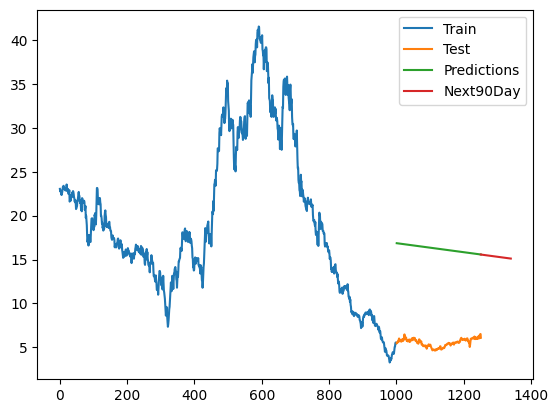

In [33]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()